<a href="https://colab.research.google.com/github/lalabobo001/test-/blob/master/using_PCA%202..ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dimension Reduction and Data Visualization Using PCA**
**主成分分析(Principal components analysis)是一種分析、簡化數據集的技術。主成分分析經常用於減少數據集的維數，同時保持數據集中的對變異數貢獻最大的特徵。這是通過保留低階主成分，忽略高階主成分做到的。其實質是在能盡可能好的代表原特徵的情況下，將原特徵進行線性變換、映射至低緯度空間中。這樣低階成分往往能夠保留住數據的最重要方面。但是，這也不是一定的，要視具體應用而定。由於主成分分析依賴所給數據，所以數據的準確性對分析結果影響很大。**


 **用PCA降維意味著去除一個或多個最小主成份，從而得到一個更低維度且保留最大數據方差的數據投影。**
 
 **在主成分分析中，一種量化量變量間關係的方法是在數據中找到一組主軸，並用這些主軸來描述數據集。**
 

 
 匯入今天要舉例的資料集以及使用的模組。

使用RandomState實例來生成隨機數數組，以亂數產生200個點，並呈現在二維平面中。
 
 
 

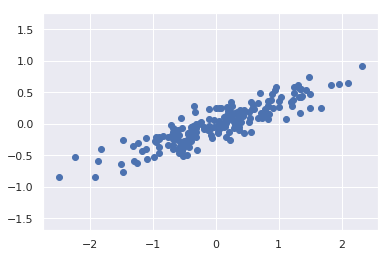

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

#產生實驗數據
rng = np.random.RandomState(1)
x = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(x[:, 0], x[:, 1])
plt.axis('equal');


 **淺色的點是原始數據，深色的數據是投影的版本。我們可以看到PCA降維的含義：沿著最不重要的主軸的信息都被去除了，僅留下了含有最高方差值的數據成分。被去除的那一小部分方差值基本可以看成是數據降維後損失的“信息”量。**
 
    1. 匯入SKlearn中的PCA模組。
   
 2. **n_components:**PCA算法中所要保留的主成分個數n，也即保留下來的特徵個數n。
 
 3.可以用pca.n_components_查看保留的組件數 ， pca.explained_variance_ 解釋平方差。
 
 4.將transformed數據，轉換為單一維度。
 
 **依據下圖輸出的結果，可以看到數據轉換為一維資料後去除雜訊，資料擬合至一條直線。**
 
 

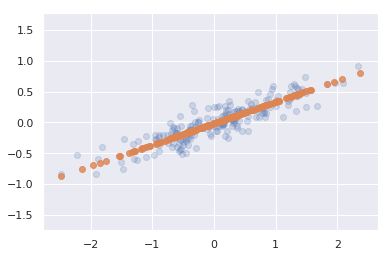

In [2]:
#降维
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(x)
x_pca = pca.transform(x)

#可視化降维的效果
x_new = pca.inverse_transform(x_pca)
plt.scatter(x[:, 0], x[:, 1], alpha=0.2)
plt.scatter(x_new[:, 0], x_new[:, 1], alpha=0.8)
plt.axis('equal');


**PCA 可以認為是選擇最優基函數的過程，這樣這些基函數中前幾個加起來就足以重構數據集中的大部分元素。用地為形式表現數據的主成分，其實就是與序列每一個元素相乘的係數。**
**我們可以通過累計方差貢獻值和希望保留的原始數據的信息量來確定需要保留的主成份數量。**

由 sklearn 套件載入 datasets 模組，然後使用 datasets 模組的 load_digits() 方法來輸入資料

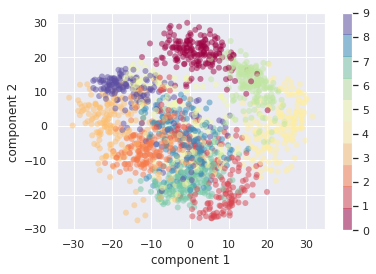

In [3]:
#將手寫數據從8x8=64維空間降维到二维空間，進行可视視化
from sklearn.datasets import load_digits
digits = load_digits()
pca = PCA(2)
projected = pca.fit_transform(digits.data)

#畫出每個點的前兩個主成份
plt.scatter(projected[:, 0], projected[:, 1], c=digits.target, edgecolor='none',
            alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();


**在實際使用PCA的過程中，正確估計用用戶描述數據的成分的數量是非常重要的環節。我們可以將累計方差貢獻率看做是關於成分數量的函數，從而確定所需成分的數量。**
 
 **二維的投影會損失很多信息 ，由圖可知我們需要大約20個成分來保持90%的方差。這個曲線量化了在N個主成分中包含了多少總的64維的方差。**



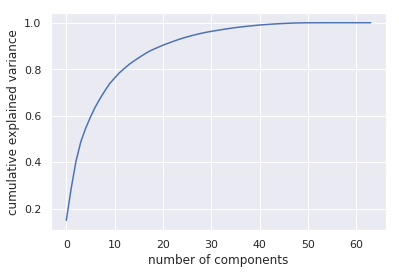

In [4]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

**PCA也可以被用作噪音數據的過濾方法，任何成分的方差都遠大於噪音的方差，所以相比於噪音，成分應該相對不受影響。因此，如果你僅用主成份的最大子集重構該數據，那麼應該可以實現選擇性保留信號並且丟棄噪音。**

只傳入一個參數的話, 為y軸, x軸為range(n)

axis()指定坐標軸的取值範圍 [xmin, xmax, ymin, ymax], 注意傳入的是一個列表即:axis([])

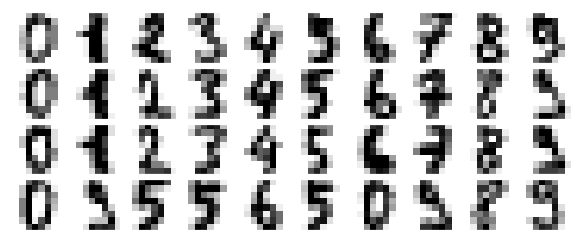

In [5]:
#定義畫圖方法
#先畫一個没有噪音的手寫數字的圖像
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4), 
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', 
                  interpolation='nearest', clim=(0, 16))
plot_digits(digits.data)

 **隨意添加一些随機噪音並創建一個噪音數據集。**
 
 爲數據加上噪音 在指定的數據集中，隨機抽取服從正態分佈的數據 兩個參數，分別是指定的數據集，和抽取出來的正太分佈的方差。


明顯的能看到打了嚴重的碼，背景尤其黑。




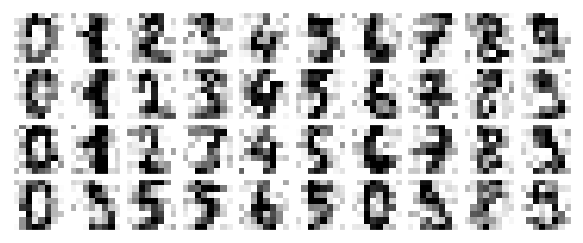

In [6]:

np.random.seed(40)
noisy = np.random.normal(digits.data, 3)
plot_digits(noisy)

**用噪音數據訓練一個只保存50%方差的PCA，再利用逆變換重構過濾後的手寫數字**。

對具有噪音的數據進行降維，然後還原。

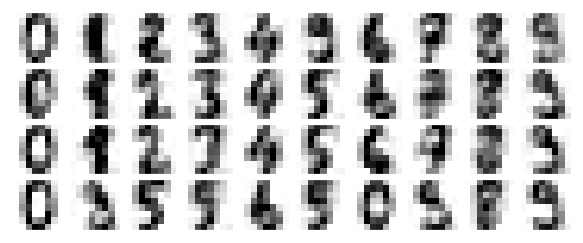

In [7]:
pca = PCA(0.50).fit(noisy)
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)